# 02 - Neural Network Classification with TensorFlow

**Content of this notebook :**
- Architecture of a classification model
- Input shapes and output shapes
    - `X` : features/data (inputs)
    - `y` : labels (outputs)
        - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and multiclass classification
    - Creating a model
    - Compiling a model
        - Defining a loss function
        - Setting up an optimizer
            - Finding the best learning rate
        - Creating evaluation metrics
    - Fitting a model (getting it to find patterns in our data)
    - Improving a model
- The power of non-linearity
- Evaluating classification models
    - Visualizing the model
    - Looking at training curves
    - Compare predictions to ground truth

## What is a Classification problem?

A `classification problem` involves predicting whether something is one thing or another.

For example we might want to:
- Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
- Decide whether a photo is of food, a person or a dog. This is called **multi-class classification** sine there are more than two options.
- Predict what categories should be assigned to Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

## Typical Architecture of neural network classification models with TensorFlow

| **Hyperparameter** | **Binary Classification** | **Multiclass Classification** |
| --- | --- | --- |
| Input layer shape | Same shape as number of features (e.g. 5 for age,sex,height,weight, smoking status in heart disease prediction) | Same as binary classification | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually ReLU (rectified linear unit) | Same as binary classification |
| Output activation | Sigmoid | Softmax |  
| Loss function | Cross entropy (`tf.keras.losses.BinaryCrossentropy` in TensorFlow) | Cross entropy (`tf.keras.losses.CategoricalCrossentropy` in TensorFlow) |
| Optimizer | SGD (stochastic gradient descent), Adam ... | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating and Viewing classification data

Let's creat a classification dataset using Scikit-Lean's `make_circles()` function.

In [12]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y  = make_circles(n_samples, noise = 0.03, random_state=42)

# Shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

> **Note:** One important step of starting any kind of machine learning project is to become one with the data. And one of the best ways to do this is to visualize the data we're working with as much as possible.

Let's create a DataFrame

In [15]:
# Make a dataframe of features and labels
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [27]:
# Check out the different labels
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

We are dealing with a **binary classification** problem. It's binary because there are only two labels (0 and 1).

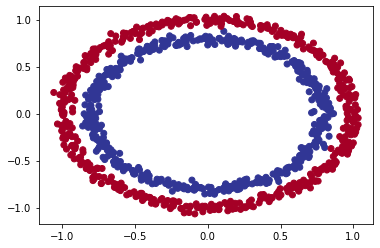

In [25]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

From the plot, we can guess that we want to build a model which classify blue or red dots. A model which is able to distinguish blue from red dots.

> **Note:** Check the website [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) and try adjusting different hyperparameters.

## Input and output shapes

One of the most common issues we'll run into building neural networks is shape mismatches. More specifically the shape of the input data and the shape of the output data.

In [28]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [29]:
# how many samples we're working with
len(X), len(y)

(1000, 1000)

In [30]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

Let's see how we'could build a neural network to model our data.

In TensorFlow, there are typically 3 fundamentals steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the `functional` or `sequential API`) or import a previously built model (transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data

In [38]:
# set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 classes (0 & 1)
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_1.fit(X,y,epochs = 10)

Epoch 1/10
32/32 [==============================] - 0s 894us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4820


Looking at the accuracy metric, the model performs poorly (50% accuracy)

In [39]:
# Train our model for longer
model_1.fit(X,y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4990
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4870
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4690
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4860
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4640
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5020
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4980
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4790
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4800
Epoch 11/

In [41]:
# Evaluate our model (Not good here because we evaluate on our training data, We need to fit on training data on evaluate on testing data)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data it's still performing poorly. 

So let's add another layer to improve our model

In [42]:
# set random seed
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(X,y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

The accuracy is still 50%...

## Improving a model

To improve the model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here we can add more layers, increase the number of hidden units within each layer, change the activation functions of each layer.
2. **Compiling a model** - we can choose a different optimization function (such as Adam) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - we can perhaps fit a model for more epochs.

<center><img src="images/02-improving-a-model-from-model-perspective.png" width=650px></center>

Let's try the following modifications:
- add more neurons
- add an extra layer
- use the Adam optimizer

In [43]:
# set the random seed
tf.random.set_seed(42)

# Create the model (3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model (using Adam)
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

Our model is still not doing better.

Let's make some visualizations to see what's happening.

> **Note:** Whenever your model is performing strangely or there's something going on with the data we are not quite sure of, remember to visualize! Inspect the data, the model and the model's predictions.

To visualize the model's predictions we're going to create a function `plot_decision_boundary()` which:
- Takes in a trained model, features `X` and labels `y`.
- Creates a meshgrid of the different `X` values.
- Makes predictions across the meshgrid.
- plots the predictions as well as a line between the different zones.

In [51]:
# import numpy
import numpy as np

In [69]:
def plot_decision_boundary(model,X,y):
    """
    Plots the decision boundary created by a model predicting on X.
    
    Inputs:
    - model - model trained
    - X - features from the dataset
    - y - labels from the dataset
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() -0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                         np.linspace(y_min,y_max,100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0])>1:
        print("doing multiclass classification...")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing binary classification...


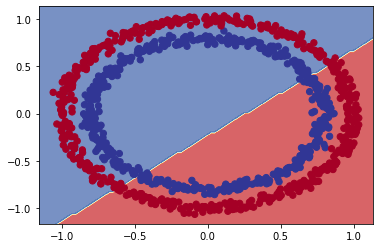

In [70]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line. In a regression problem, our model might work. In fact, let's try it.

In [85]:
# let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_8" (type Sequential).
    
    Input 0 of layer "dense_14" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem. But we're now working on a regression problem, let's change the model to suit our data

In [86]:
# set the random seed
tf.random.set_seed(42)

# Create the model (3 layers)
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# Compile the model (using Adam)
model_reg.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit the model
model_reg.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [87]:
# make some predictions on our regression problem
y_pred_reg = model_reg(X_reg_test, y_reg_test)

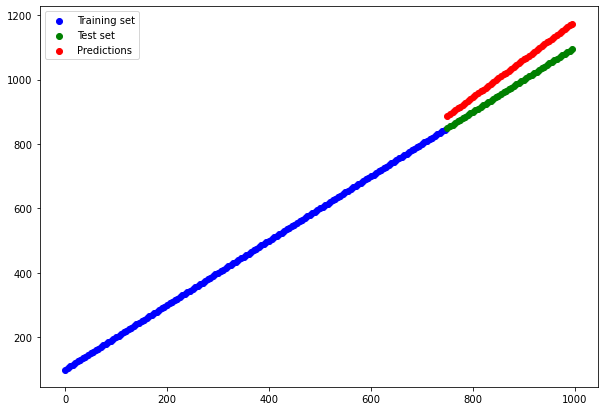

In [89]:
# Visualize the predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, color = "blue", label ="Training set")
plt.scatter(X_reg_test,y_reg_test, color = "green", label ="Test set")
plt.scatter(X_reg_test,y_pred_reg, color = "red", label ="Predictions")
plt.legend()
plt.show()

The predictions aren't perfet but they look better than the result of the classification problem. So this means our model must be learning something but we're missing out on four our classification problem.

## The missing piece : Non-linearity